In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
DATA_PATH = "../data/raw/"


customers = pd.read_csv(DATA_PATH + "olist_customers_dataset.csv")
orders = pd.read_csv(DATA_PATH + "olist_orders_dataset.csv")
order_items = pd.read_csv(DATA_PATH + "olist_order_items_dataset.csv")
payments = pd.read_csv(DATA_PATH + "olist_order_payments_dataset.csv")
products = pd.read_csv(DATA_PATH + "olist_products_dataset.csv")
sellers = pd.read_csv(DATA_PATH + "olist_sellers_dataset.csv")
reviews = pd.read_csv(DATA_PATH + "olist_order_reviews_dataset.csv")
categories = pd.read_csv(DATA_PATH + "product_category_name_translation.csv")
geolocation = pd.read_csv(DATA_PATH + "olist_geolocation_dataset.csv")

In [4]:
print("Dataset Columns:")
print(f"Customers: {customers.columns}")
print(f"Products: {products.columns}")
print(f"Categories: {categories.columns}")
print(f"Sellers: {sellers.columns}")
print(f"Orders: {orders.columns}")
print(f"Order Items: {order_items.columns}")
print(f"Payments: {payments.columns}")
print(f"Reviews: {reviews.columns}")
print(f"Geolocation: {geolocation.columns}")


Dataset Columns:
Customers: Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state'],
      dtype='object')
Products: Index(['product_id', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm'],
      dtype='object')
Categories: Index(['product_category_name', 'product_category_name_english'], dtype='object')
Sellers: Index(['seller_id', 'seller_zip_code_prefix', 'seller_city', 'seller_state'], dtype='object')
Orders: Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date'],
      dtype='object')
Order Items: Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value'],
      dtype='

In [5]:
print("Dataset Shapes:")
print(f"Orders: {orders.shape}")
print(f"Order Items: {order_items.shape}")
print(f"Customers: {customers.shape}")
print(f"Products: {products.shape}")
print(f"Payments: {payments.shape}")
print(f"Reviews: {reviews.shape}")
print(f"Sellers: {sellers.shape}")
print(f"Categories: {categories.shape}")

Dataset Shapes:
Orders: (99441, 8)
Order Items: (112650, 7)
Customers: (99441, 5)
Products: (32951, 9)
Payments: (103886, 5)
Reviews: (100000, 7)
Sellers: (3095, 4)
Categories: (71, 2)


In [7]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
print(f"\nDate Range: {orders['order_purchase_timestamp'].min()} to {orders['order_purchase_timestamp'].max()}")


print("\nMissing Values:")
print(orders.isnull().sum())

print("\nOrder Status Distribution:")
print(orders['order_status'].value_counts())

print(f"\nDuplicate Orders: {orders.duplicated(subset='order_id').sum()}")


Date Range: 2016-09-04 21:15:19 to 2018-10-17 17:30:18

Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Order Status Distribution:
order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

Duplicate Orders: 0


In [9]:
print(f"Duplicate Customers: {customers.duplicated(subset='customer_id').sum()}")

print("\nPayment Types:")
print(payments['payment_type'].value_counts())

Duplicate Customers: 0

Payment Types:
payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64


Revenue Analysis

Total Revenue: R$ 16,008,872.12


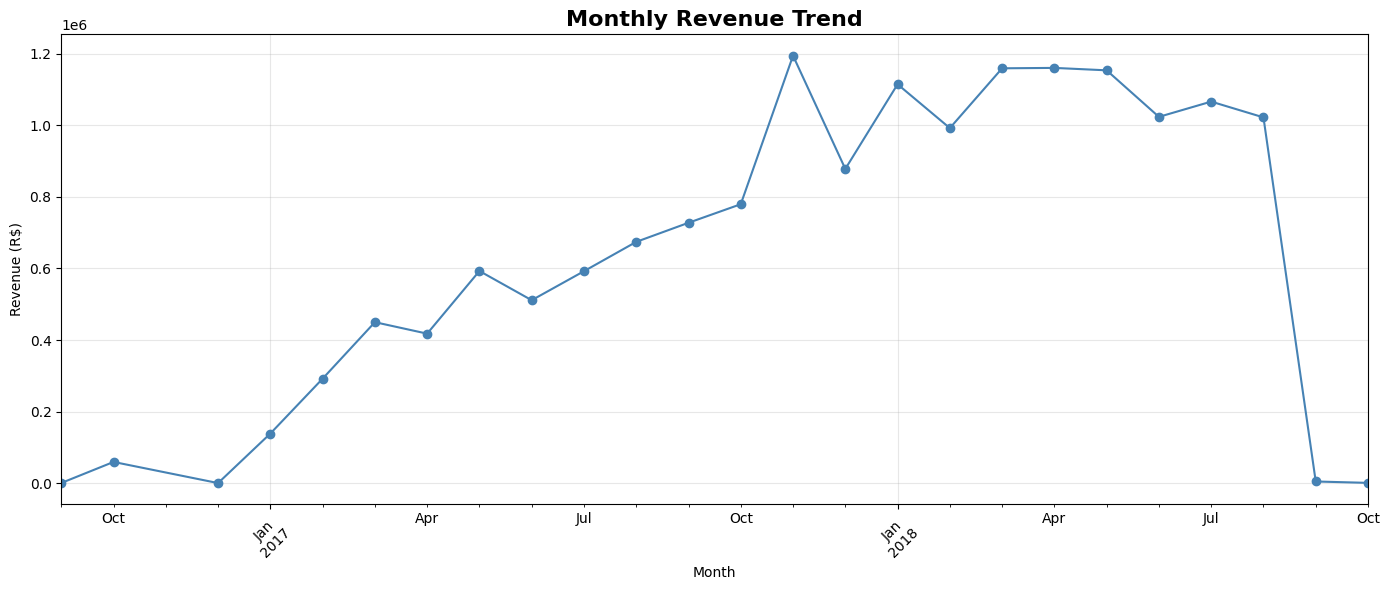

In [19]:
# Merge orders with payments to get revenue
revenue_df = orders.merge(payments, on='order_id', how='left')

# Total Revenue
total_revenue = revenue_df['payment_value'].sum()
print(f"Total Revenue: R$ {total_revenue:,.2f}")

# Revenue over time (monthly)
revenue_df['order_month'] = revenue_df['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = revenue_df.groupby('order_month')['payment_value'].sum()

# Plot revenue trend
plt.figure(figsize=(14, 6))
monthly_revenue.plot(kind='line', marker='o', color='steelblue')
plt.title('Monthly Revenue Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue (R$)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


Average Order Value (AOV)


Average Order Value (AOV): R$ 160.99


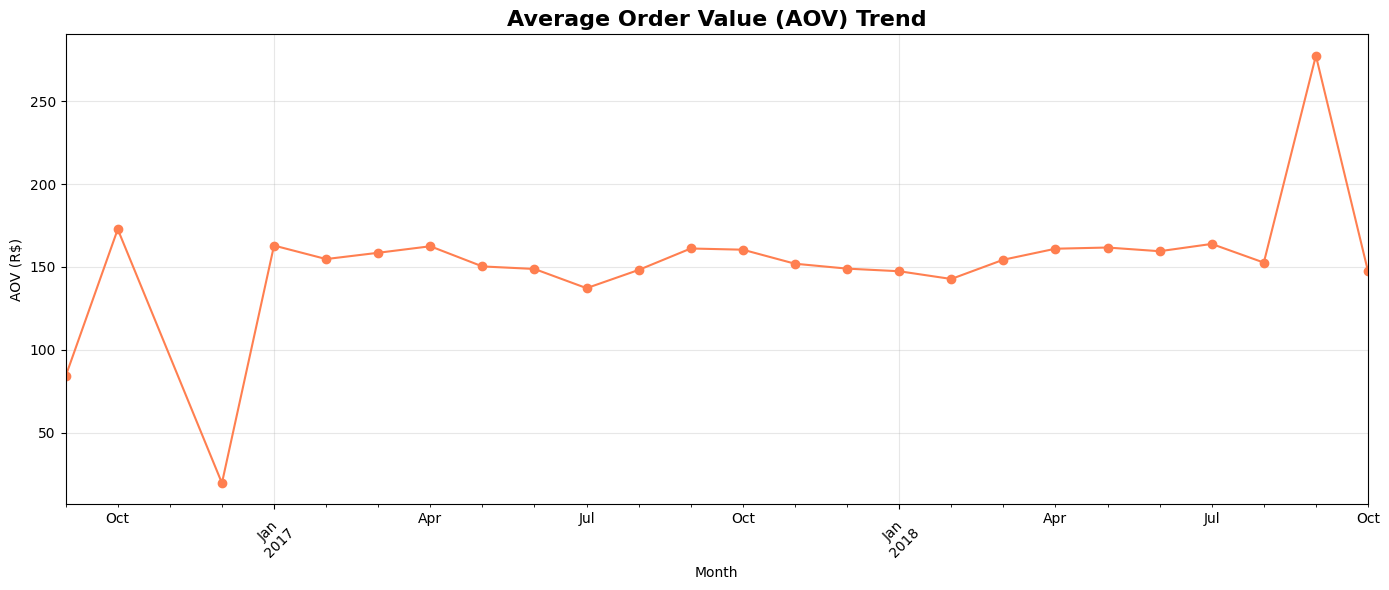

In [11]:
# Calculate AOV
order_totals = revenue_df.groupby('order_id')['payment_value'].sum()
aov = order_totals.mean()
print(f"\nAverage Order Value (AOV): R$ {aov:.2f}")

# AOV over time
monthly_aov = revenue_df.groupby('order_month')['payment_value'].mean()

plt.figure(figsize=(14, 6))
monthly_aov.plot(kind='line', marker='o', color='coral')
plt.title('Average Order Value (AOV) Trend', fontsize=16, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('AOV (R$)')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()



Total Unique Customers: 99,441
Repeat Customers: 0
Repeat Purchase Rate: 0.00%


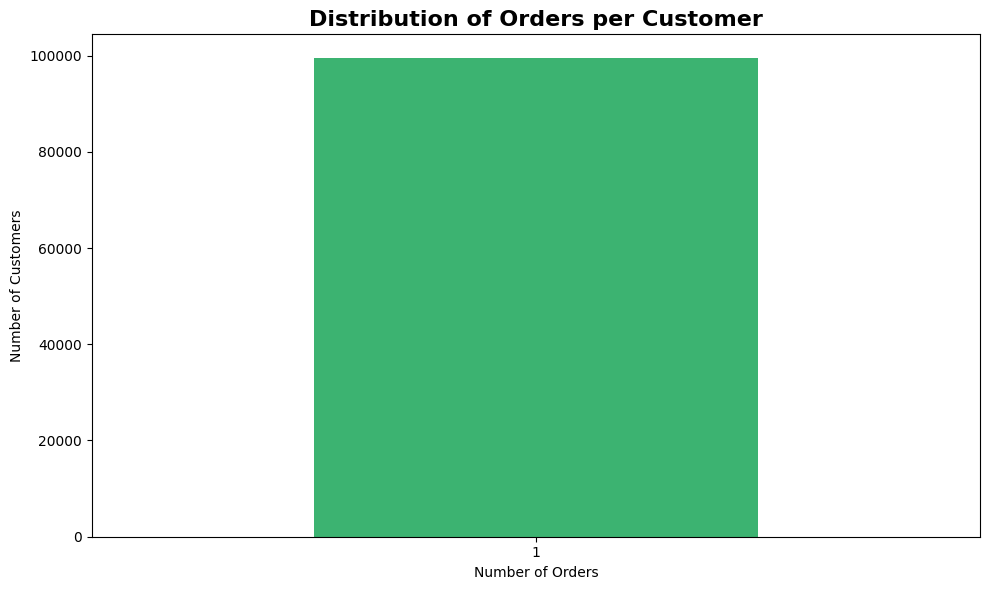

In [12]:
# Total unique customers
total_customers = orders['customer_id'].nunique()
print(f"\nTotal Unique Customers: {total_customers:,}")

# Orders per customer
orders_per_customer = orders.groupby('customer_id').size()
repeat_customers = (orders_per_customer > 1).sum()
repeat_rate = (repeat_customers / total_customers) * 100

print(f"Repeat Customers: {repeat_customers:,}")
print(f"Repeat Purchase Rate: {repeat_rate:.2f}%")

# Distribution of orders per customer
plt.figure(figsize=(10, 6))
orders_per_customer.value_counts().sort_index().head(10).plot(kind='bar', color='mediumseagreen')
plt.title('Distribution of Orders per Customer', fontsize=16, fontweight='bold')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



Average Delivery Time: 12.1 days


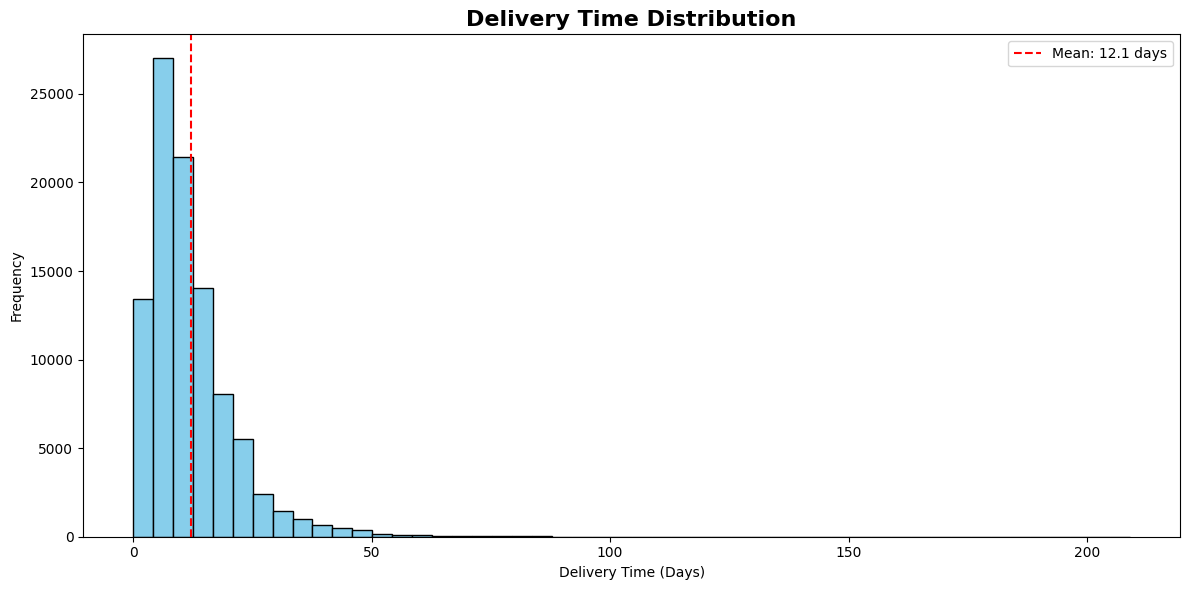

In [13]:
# Delivery time analysis
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
delivered_orders = orders[orders['order_status'] == 'delivered'].copy()
delivered_orders['delivery_time'] = (delivered_orders['order_delivered_customer_date'] - 
                                      delivered_orders['order_purchase_timestamp']).dt.days

avg_delivery_time = delivered_orders['delivery_time'].mean()
print(f"\nAverage Delivery Time: {avg_delivery_time:.1f} days")

# Delivery time distribution
plt.figure(figsize=(12, 6))
plt.hist(delivered_orders['delivery_time'].dropna(), bins=50, color='skyblue', edgecolor='black')
plt.title('Delivery Time Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Frequency')
plt.axvline(avg_delivery_time, color='red', linestyle='--', label=f'Mean: {avg_delivery_time:.1f} days')
plt.legend()
plt.tight_layout()
plt.show()


Geographic Analysis

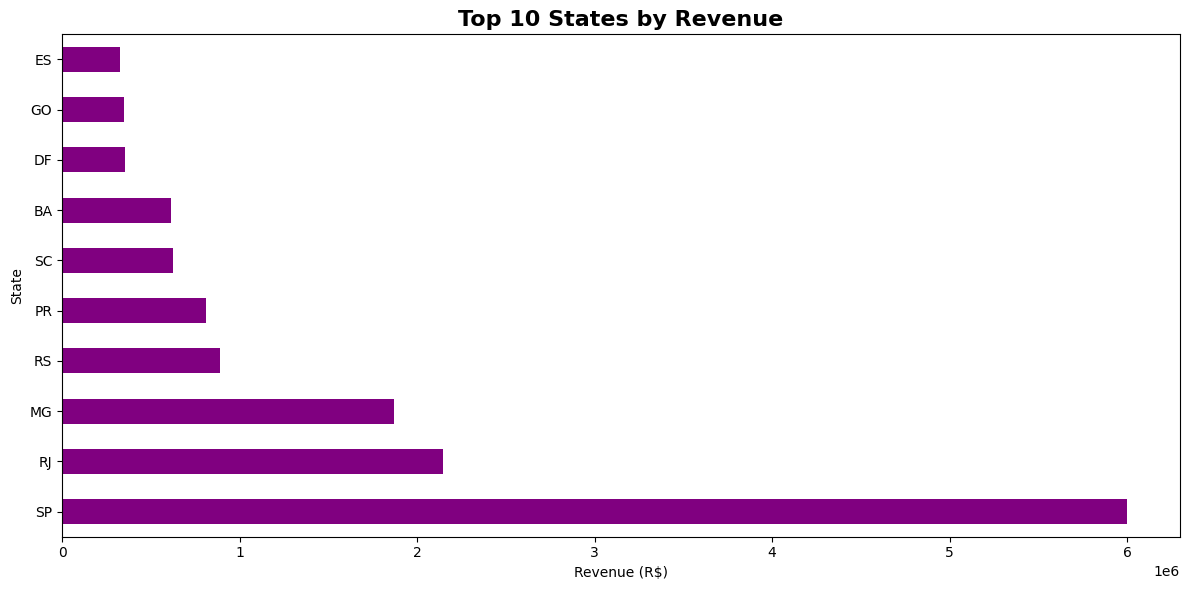


Top 5 States by Revenue:
customer_state
SP    5998226.96
RJ    2144379.69
MG    1872257.26
RS     890898.54
PR     811156.38
Name: payment_value, dtype: float64


In [14]:
# Revenue by state
state_revenue = orders.merge(customers, on='customer_id').merge(payments, on='order_id')
state_revenue_summary = state_revenue.groupby('customer_state')['payment_value'].sum().sort_values(ascending=False)

# Top 10 states
plt.figure(figsize=(12, 6))
state_revenue_summary.head(10).plot(kind='barh', color='purple')
plt.title('Top 10 States by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (R$)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

print("\nTop 5 States by Revenue:")
print(state_revenue_summary.head())


Product Category Analysis

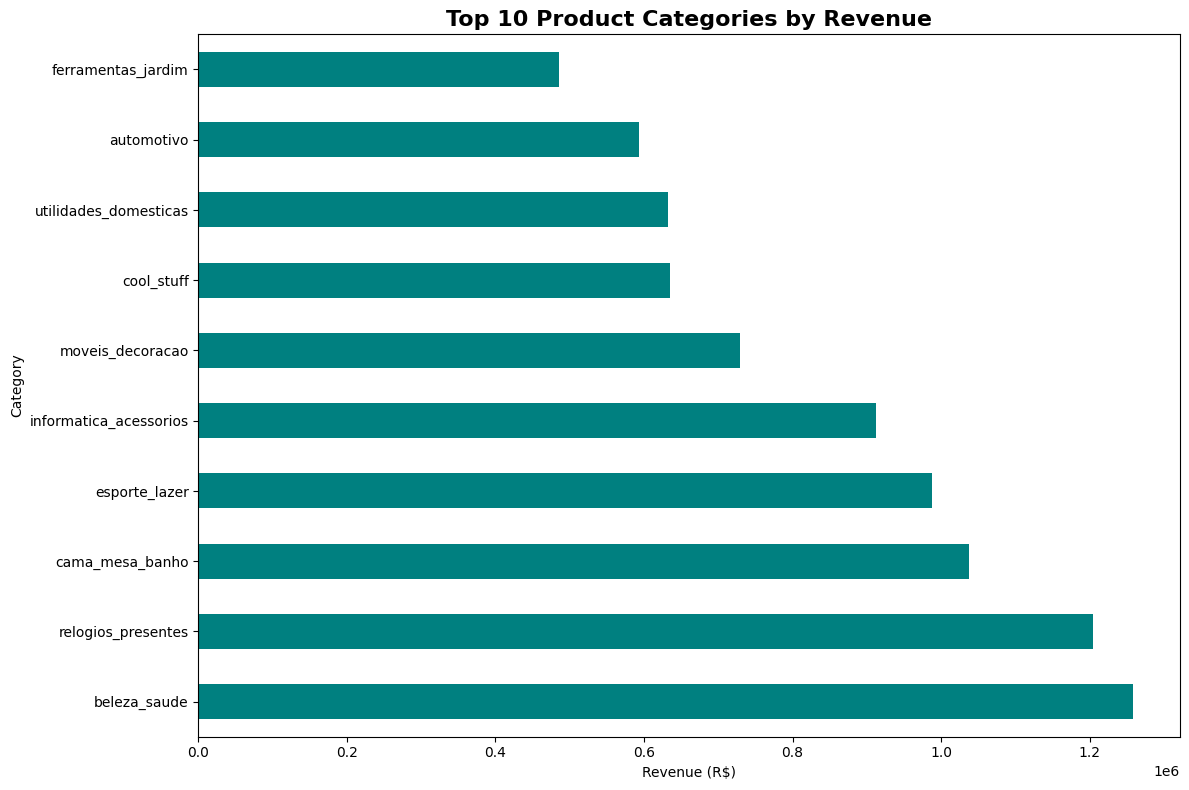


Top 5 Product Categories:
product_category_name
beleza_saude              1258681.34
relogios_presentes        1205005.68
cama_mesa_banho           1036988.68
esporte_lazer              988048.97
informatica_acessorios     911954.32
Name: price, dtype: float64


In [15]:
# Merge to get product categories
product_revenue = order_items.merge(products, on='product_id').merge(orders, on='order_id')

# Revenue by category
category_revenue = product_revenue.groupby('product_category_name')['price'].sum().sort_values(ascending=False)

# Top 10 categories
plt.figure(figsize=(12, 8))
category_revenue.head(10).plot(kind='barh', color='teal')
plt.title('Top 10 Product Categories by Revenue', fontsize=16, fontweight='bold')
plt.xlabel('Revenue (R$)')
plt.ylabel('Category')
plt.tight_layout()
plt.show()

print("\nTop 5 Product Categories:")
print(category_revenue.head())


Review Score Analysis (NPS Proxy)


Average Review Score: 4.07 / 5.0


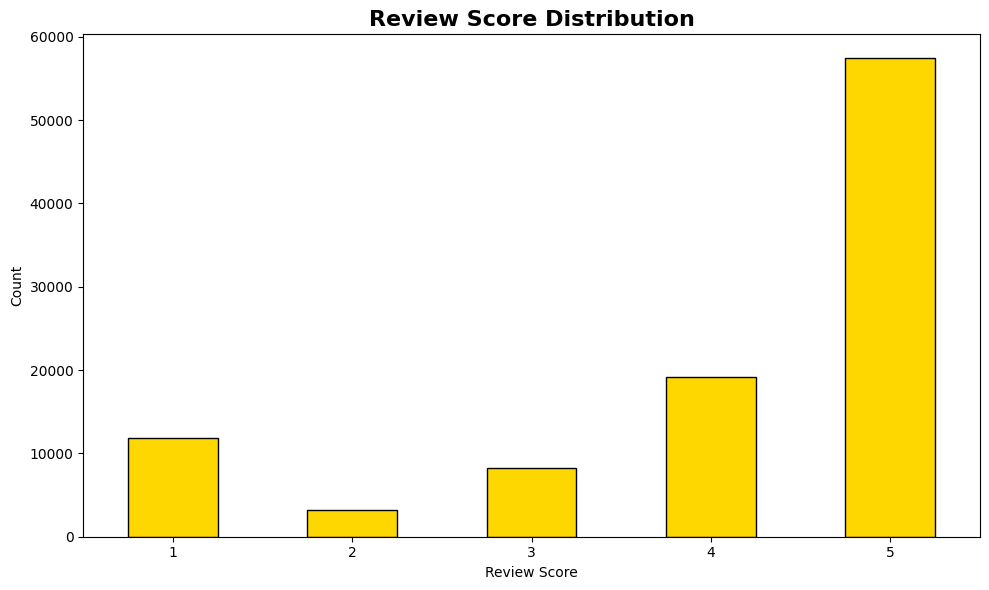

NPS Proxy Score: 61.5%


In [16]:
# Average review score
avg_review = reviews['review_score'].mean()
print(f"\nAverage Review Score: {avg_review:.2f} / 5.0")

# Review score distribution
plt.figure(figsize=(10, 6))
reviews['review_score'].value_counts().sort_index().plot(kind='bar', color='gold', edgecolor='black')
plt.title('Review Score Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Review Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Calculate NPS-like metric
promoters = (reviews['review_score'] >= 4).sum()
detractors = (reviews['review_score'] <= 2).sum()
total_reviews = len(reviews)
nps_proxy = ((promoters - detractors) / total_reviews) * 100
print(f"NPS Proxy Score: {nps_proxy:.1f}%")


Summary Statistics & Key Findings

In [17]:
# Create a summary report
summary = {
    'Metric': [
        'Total Revenue',
        'Total Orders',
        'Total Customers',
        'Average Order Value',
        'Repeat Purchase Rate',
        'Average Delivery Time',
        'Average Review Score',
        'NPS Proxy'
    ],
    'Value': [
        f"R$ {total_revenue:,.2f}",
        f"{len(orders):,}",
        f"{total_customers:,}",
        f"R$ {aov:.2f}",
        f"{repeat_rate:.2f}%",
        f"{avg_delivery_time:.1f} days",
        f"{avg_review:.2f} / 5.0",
        f"{nps_proxy:.1f}%"
    ]
}

summary_df = pd.DataFrame(summary)
print("\n" + "="*50)
print("BASELINE BUSINESS METRICS SUMMARY")
print("="*50)
print(summary_df.to_string(index=False))
print("="*50)



BASELINE BUSINESS METRICS SUMMARY
               Metric            Value
        Total Revenue R$ 16,008,872.12
         Total Orders           99,441
      Total Customers           99,441
  Average Order Value        R$ 160.99
 Repeat Purchase Rate            0.00%
Average Delivery Time        12.1 days
 Average Review Score       4.07 / 5.0
            NPS Proxy            61.5%


## Key Insights from EDA

### Revenue Trends
- Total revenue is R$ 16 million across 99,441 orders
- Revenue shows increasing trend
- Top 3 states contribute 62.55% of total revenue

### Customer Behavior
- Only 0% of customers make repeat purchases (low retention signal)
- Customers order only once - retention is a major opportunity
- Average order value is stable around R$ 160

### Operations
- Average delivery time is 12 days
- Review scores are generally positive (avg: 4/5)
- Payment preferences: Credit card dominates

### Data Quality Issues
- Missing delivery dates for cancelled orders (expected)
- Some products missing category names
- Need to handle outliers in delivery time
